# Fish Populations in the Salton Sea and paragraph that describes what you are doing.

## US Fish and Wildlife collects quarterly fishery data in the Salton Sea. Fish populations have severely declined in the lake due to agricultural run off, and high evaporation rates causing the lake to become to saline for most fish species. Here, I will examine the data to uncover how many sampling sites there are and how many sampling events have had more than 500 tilapia.


In [1]:
import pandas as pd
import geopandas as gpd

In [3]:
# read and add shapefile to notebookva
fish = gpd.read_file('data/SaltonSeaFish.csv')


In [4]:
fish.shape

(409, 17)

In [5]:
fish.info

<bound method DataFrame.info of         longitude     latitude OBJECTID               PULL_DATE  \
0    -12906353.25  3964286.935        1  2008/04/03 00:00:00+00   
1    -12918978.94  3962128.962        2  2008/04/03 00:00:00+00   
2    -12895737.45  3952891.324        3  2008/04/11 00:00:00+00   
3    -12917367.53  3952583.188        4  2008/04/15 00:00:00+00   
4    -12908343.52  3941190.322        5  2008/04/16 00:00:00+00   
..            ...          ...      ...                     ...   
404  -12898906.83  3931692.064      405  2007/07/26 00:00:00+00   
405  -12879300.21  3913176.135      406  2007/07/31 00:00:00+00   
406  -12894448.64    3919637.7      407  2007/08/01 00:00:00+00   
407  -12886715.16  3942739.984      408  2007/10/11 00:00:00+00   
408  -12886715.16  3942739.984      409  2007/10/11 00:00:00+00   

                  SITE  HABITAT_TY NET_HRS TILAPIA OTHER CORVINA SARGO  \
0          North Shore  Near-shore   24.25    1453     0       0     0   
1     Whitewate

In [6]:
fish.head()

,longitude,latitude,OBJECTID,PULL_DATE,SITE,HABITAT_TY,NET_HRS,TILAPIA,OTHER,CORVINA,SARGO,CROAKER,COMMENTS,UTM_E,UTM_N,REPORT,geometry
0,-12906353.25,3964286.935,1,2008/04/03 00:00:00+00,North Shore,Near-shore,24.25,1453,0,0,0,0,,598465,3709237,,None
1,-12918978.94,3962128.962,2,2008/04/03 00:00:00+00,Whitewater River,Estuarine,24,886,0,0,0,0,,587948,3707343,,None
2,-12895737.45,3952891.324,3,2008/04/11 00:00:00+00,Bat Caves,Near-shore,23.5,610,0,0,0,0,,607427,3699864,,None
3,-12917367.53,3952583.188,4,2008/04/15 00:00:00+00,Desert Shores,Near-shore,24,262,0,0,0,0,,589366,3699424,,None
4,-12908343.52,3941190.322,5,2008/04/16 00:00:00+00,The Dome,Near-shore,24.25,778,0,0,0,0,,596997,3690022,,None


In [7]:
fish.type

0      None
1      None
2      None
3      None
4      None
       ... 
404    None
405    None
406    None
407    None
408    None
Length: 409, dtype: object

In [8]:
#data set says geometry= none, so we need to run this line of code to associate lat/long with geodf
#geodf= converting regular df to geodf
gdf = gpd.GeoDataFrame(
   fish, geometry=gpd.points_from_xy(fish.longitude, fish.latitude),crs= 'epsg:4326'

)

<AxesSubplot: >

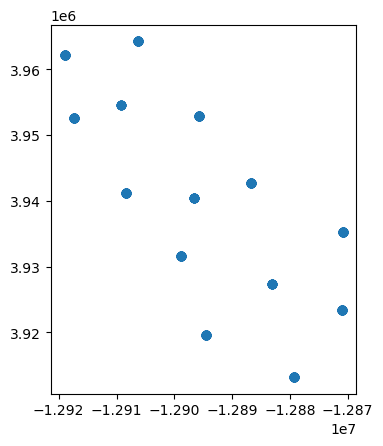

In [9]:
gdf.plot()

In [13]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
fish.value_counts()

site_count = fish['SITE'].value_counts()
site_count

Alamo River 1              15
Alamo River 2              15
North Wister 2             15
North Wister 1             15
North Desert Shores 1      14
New River 2                14
New River 1                14
North Shore 2              14
North Shore 1              14
Whitewater River 2         14
Whitewater River 1         14
The Dome 2                 14
The Dome 1                 14
Bat Caves 1                14
Bat Caves 2                14
South Salton City 1        14
South Salton City 2        14
Test Base 1                14
Test Base 2                14
The Cliffs 1               14
North Desert Shores 2      14
The Cliffs 2               13
Whitewater River            6
North Shore                 6
Bat Caves                   6
Alamo River                 6
Test Base                   6
New River                   6
The Cliffs                  6
The Dome                    6
North Desert Shores         4
North Wister                4
South Salton City           4
South Basi

In [15]:
fish.query("TILAPIA > '500'")

,longitude,latitude,OBJECTID,PULL_DATE,SITE,HABITAT_TY,NET_HRS,TILAPIA,OTHER,CORVINA,SARGO,CROAKER,COMMENTS,UTM_E,UTM_N,REPORT,geometry
1,-12918978.94,3962128.962,2,2008/04/03 00:00:00+00,Whitewater River,Estuarine,24,886,0,0,0,0,,587948,3707343,,POINT (-12918978.94000 3962128.96200)
2,-12895737.45,3952891.324,3,2008/04/11 00:00:00+00,Bat Caves,Near-shore,23.5,610,0,0,0,0,,607427,3699864,,POINT (-12895737.45000 3952891.32400)
4,-12908343.52,3941190.322,5,2008/04/16 00:00:00+00,The Dome,Near-shore,24.25,778,0,0,0,0,,596997,3690022,,POINT (-12908343.52000 3941190.32200)
5,-12886715.16,3942739.984,6,2008/04/18 00:00:00+00,The Cliffs,Near-shore,24,524,0,0,0,0,,615062,3691509,,POINT (-12886715.16000 3942739.98400)
7,-12894448.64,3919637.7,8,2008/04/25 00:00:00+00,Test Base,Near-shore,22.75,756,0,0,0,0,,608813,3672196,,POINT (-12894448.64000 3919637.70000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,-12906353.25,3964286.935,401,2007/07/19 00:00:00+00,North Shore,Near-shore,24,585,0,0,0,0,,598465,3709237,http://www.nrm.dfg.ca.gov/FileHandler.ashx?Doc...,POINT (-12906353.25000 3964286.93500)
401,-12918978.94,3962128.962,402,2007/07/20 00:00:00+00,Whitewater River,Estuarine,24,558,0,0,0,0,,587948,3707343,http://www.nrm.dfg.ca.gov/FileHandler.ashx?Doc...,POINT (-12918978.94000 3962128.96200)
402,-12917367.53,3952583.188,403,2007/07/24 00:00:00+00,North Desert Shores,Near-shore,24.25,684,0,0,0,0,,589366,3699424,http://www.nrm.dfg.ca.gov/FileHandler.ashx?Doc...,POINT (-12917367.53000 3952583.18800)
407,-12886715.16,3942739.984,408,2007/10/11 00:00:00+00,The Cliffs 1,Near-shore,23.5,687,0,0,0,0,,615062,3691509,http://www.nrm.dfg.ca.gov/FileHandler.ashx?Doc...,POINT (-12886715.16000 3942739.98400)


## Through my query, I found that there has been 500 or more tilapia in the Salton Sea atleast 79 times during the quarterly fishery surveys. I also discovered that there are 48 sampling sites using the value counts feature.  